In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(18,12)})

# Intro

I´m comparing the price development of apartments in Stockholm with the price development of omx30 (between 2013-2020)

# read omx30

In [9]:
# read omx30 
omx30 = pd.read_csv("../omx30/omx30_v1.csv")

In [10]:
# looks good
omx30

,år_månad,SK,SK_n
0,2013-01-01,1140.678182,1.000000
1,2013-02-01,1183.766500,1.037774
2,2013-03-01,1205.377500,1.056720
3,2013-04-01,1178.400000,1.033070
4,2013-05-01,1225.900476,1.074712
...,...,...,...
88,2020-05-01,1559.440526,1.367117
89,2020-06-01,1669.241429,1.463376
90,2020-07-01,1738.922174,1.524463
91,2020-08-01,1766.410000,1.548561


# Read sthlm & create new df: avg. price/sqm grouped by year and month

In [11]:
# read sthlm
sthlm = pd.read_csv("../sthlm/sthlm_v1.csv")

In [16]:
# new df with avg. price / sqm grouped by year and month 
sthlm = sthlm.groupby("år_månad")[["kr_kvm"]].mean()

In [17]:
# Function to normalize change of price 
def sthlm_n(x):
    return x / 60006.513158

In [18]:
# apply function
sthlm["kr_kvm_n"] = sthlm.kr_kvm.apply(sthlm_n)

In [19]:
# inspect df
# looks good
sthlm

,kr_kvm,kr_kvm_n
år_månad,,
2013-01-01,60006.513158,1.000000
2013-02-01,60074.901961,1.001140
2013-03-01,60748.935018,1.012372
2013-04-01,61440.541667,1.023898
2013-05-01,60935.202279,1.015476
...,...,...
2020-05-01,89510.861423,1.491686
2020-06-01,91540.340351,1.525507
2020-07-01,91193.723629,1.519730


# Create new df with sthlm and omx30

In [22]:
sthlm_omx30 = sthlm

In [29]:
sthlm_omx30["omx_30_n"] = omx30.SK_n.values

In [33]:
sthlm_omx30

,kr_kvm,kr_kvm_n,omx_30_n
år_månad,,,
2013-01-01,60006.513158,1.000000,1.000000
2013-02-01,60074.901961,1.001140,1.037774
2013-03-01,60748.935018,1.012372,1.056720
2013-04-01,61440.541667,1.023898,1.033070
2013-05-01,60935.202279,1.015476,1.074712
...,...,...,...
2020-05-01,89510.861423,1.491686,1.367117
2020-06-01,91540.340351,1.525507,1.463376
2020-07-01,91193.723629,1.519730,1.524463


In [34]:
sthlm_omx30.drop(columns = "kr_kvm", inplace = True)

In [43]:
sthlm_omx30.index = pd.to_datetime(sthlm_omx30.index)

# Plot price dev. sthlm & omx30 2013-2020

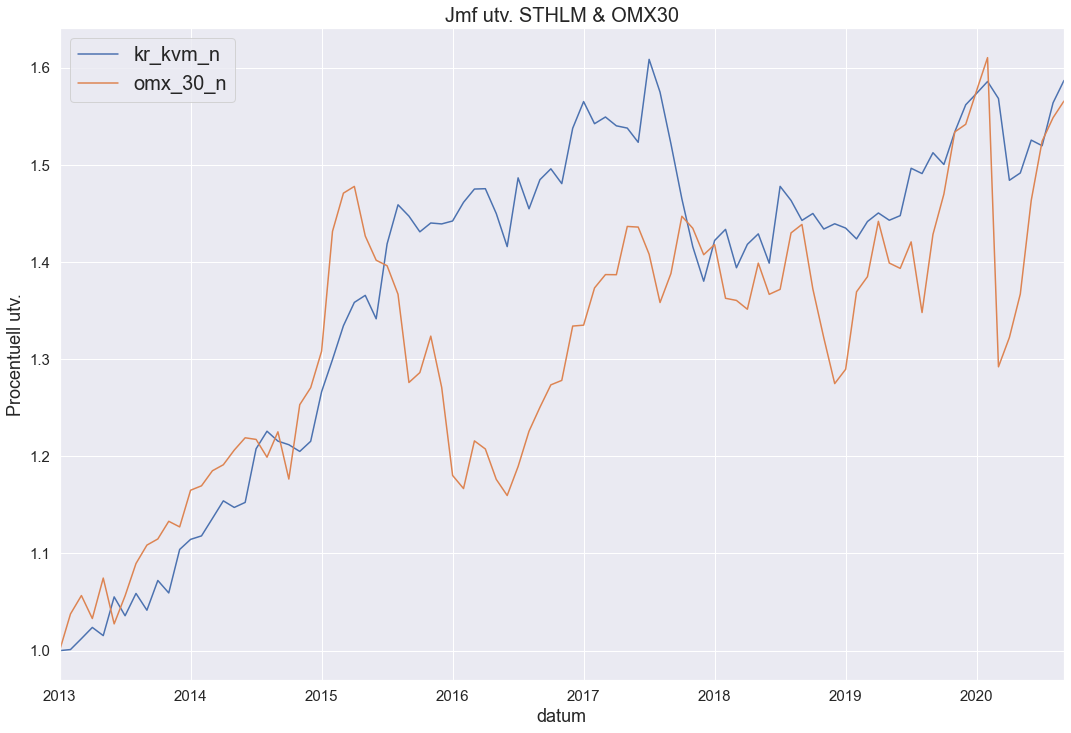

In [45]:
# Findings: They follow each other quite closely except for mid 2015 - mid 2016 
# A possible explanation for this is: 
# omx30 took a dive in the turmoil regarding "Grexit" 
# In the same period of time there were also turmoil in the chinese stock market which affected european markets
# Prices for apartments in Stockholm were not affected by this turmoil (Grexit & the chinese stock market)

sthlm_omx30.plot()

plt.title("Jmf utv. STHLM & OMX30", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Procentuell utv.", fontsize = 18)
plt.xlabel("datum", fontsize = 18)
plt.legend(fontsize = 20)

plt.show()

# Scatterplot OMX30 & sthlm

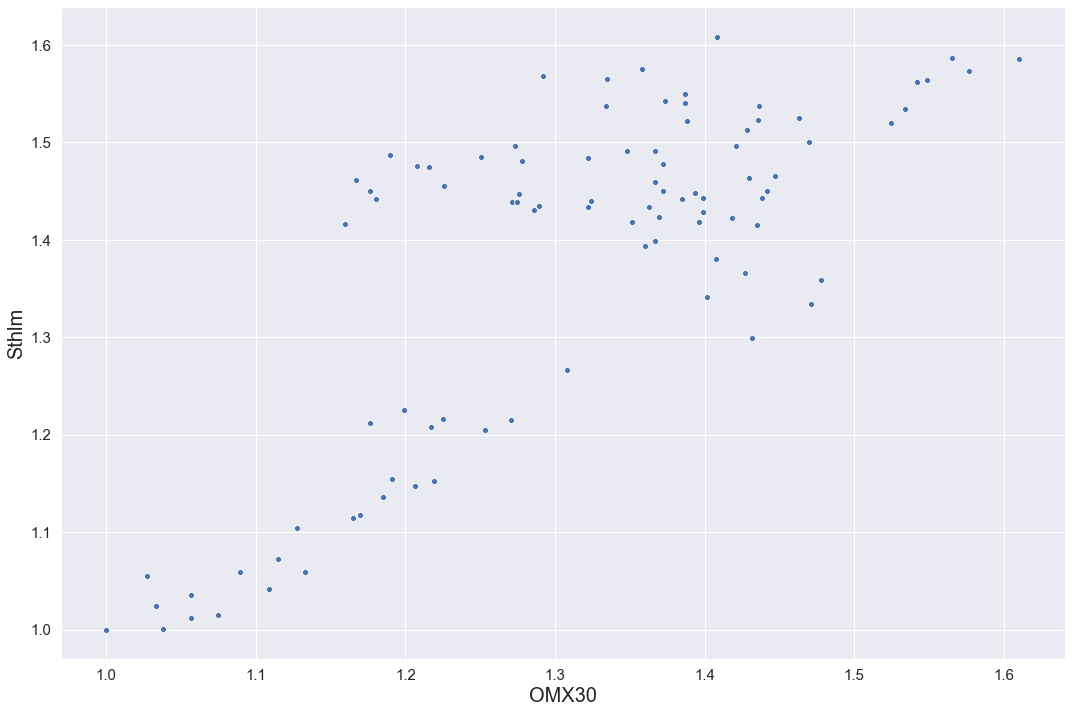

In [52]:
sns.scatterplot(data = sthlm_omx30, y = "kr_kvm_n", x = "omx_30_n")
plt.ylabel("Sthlm", fontsize = 20)
plt.xlabel("OMX30", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()